# 【問題1】1次関数
$x$ が-50から50の範囲で次の式を考えます。

$$
y
=
\frac{1}{2} 
x
+
1
$$
-50から50まで0.1間隔のxを表すndarrayと、各要素に対するyを表すndarrayを作成してください。

In [99]:
import numpy as np
start_point = -50
stop_point = 50
step = 0.1

# yを表すndarrayを作成
x_ndarray = np.arange(start_point, stop_point + step, step)
y_ndarray = (1/2 * x_ndarray) + 1

print("y_ndarray{}".format(y_ndarray))
print("y_ndarrayの形状は{}".format(y_ndarray.shape))


y_ndarray[-24.   -23.95 -23.9  ...  25.9   25.95  26.  ]
y_ndarrayの形状は(1001,)


# 【問題2】配列の結合
問題1で作成したndarrayを結合し、(1001, 2)の形の配列にしてください。0列目にx、1列目にyが来るようにします。

In [46]:
#形状を２次元に変更する
x_ndarray =x_ndarray.reshape(-1, 1)
y_ndarray = y_ndarray.reshape(-1, 1)

print("形状を確認すると{}, {}".format(x_ndarray.shape, y_ndarray.shape))

#結合
xy_ndarray = np.concatenate([x_ndarray, y_ndarray], axis=1)
print("結合後の形状を確認すると{}".format(xy_ndarray.shape))

#結合の値が正しいか確認
print(xy_ndarray)

形状を確認すると(1001, 1), (1001, 1)
結合後の形状を確認すると(1001, 2)
[[-50.   -24.  ]
 [-49.9  -23.95]
 [-49.8  -23.9 ]
 ...
 [ 49.8   25.9 ]
 [ 49.9   25.95]
 [ 50.    26.  ]]


# 【問題3】勾配を求める
各x座標における勾配を求めます。ここで勾配はyの変化量をxの変化量で割ることで計算します。


$$
勾配＝\frac{yの変化量}{xの変化量} 
$$


各変化量は以下の図のように隣同士の要素の差から近似的に求めます。



《注意》


厳密に各点における勾配を求めるには極限（微分）を利用する必要があります
勾配はx座標の間隔を使うので、xの要素数に対して一つ少なくなります

In [47]:
#x,yの変化量を求める
x_gradient = xy_ndarray[1:, 0] - xy_ndarray[:-1, 0]
y_gradient = xy_ndarray[1:, 1] - xy_ndarray[:-1, 1]

# 形状の確認
print("形状を確認すると{}, {}".format(x_gradient.shape, y_gradient.shape))

# 実際の値
np.set_printoptions(threshold=10)
print("x_gradient:{}  y_gradient:{}".format(x_gradient, y_gradient))

# 変化量を求める
gradient = y_gradient / x_gradient

print("勾配:{}".format(gradient))

形状を確認すると(1000,), (1000,)
x_gradient:[0.1 0.1 0.1 ... 0.1 0.1 0.1]  y_gradient:[0.05 0.05 0.05 ... 0.05 0.05 0.05]
勾配:[0.5 0.5 0.5 ... 0.5 0.5 0.5]


# 【問題4】グラフを描く
1次関数のグラフをMatplotlibを用いて描いてください。また、それとは別に横軸をx、縦軸を勾配としたグラフも描いてください。

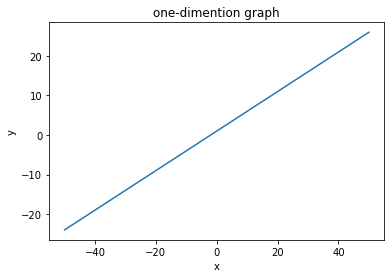

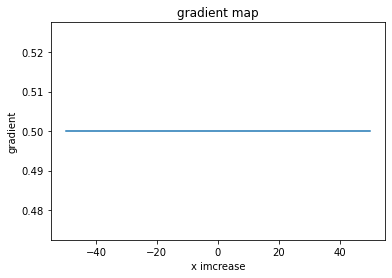

In [48]:
import matplotlib.pyplot as plt

# 一次関数のグラフ
plt.title("one-dimention graph")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_ndarray, y_ndarray)
plt.show()

# 横軸をx、縦軸を勾配のグラフ
plt.title("gradient map")
plt.xlabel("x imcrease")
plt.ylabel("gradient")
plt.plot(x_ndarray[1:], gradient)
plt.show()

# 【問題5】Pythonの関数化
問題1から問題3までの範囲をまとめて行うPythonの関数を雛形を参考に作成してください。


そして、以下の3式の勾配を0.1間隔で求めてndarrayで出力してください。

$$
y = x^{2} \quad (-50\leq x \leq 50)\\ y = 2x^{2}+2^{x} \quad (-50\leq x \leq 50)\\ y = sin(x^{\frac{1}{2}}) \quad (0\leq x \leq 50)
$$
また、問題4と同様にグラフを描いてください。


ndarrayに対して三角関数のsinの計算を行うには np.sin()を用います。





In [97]:
# 雛形の存在を把握しておらず、独自で作成しました。
# ご了承頂けますと幸いです。
import numpy as np
import warnings 
warnings.simplefilter("ignore")

start_point = -50
stop_point = 50
step = 0.1

def multi_gradient(start=start_point, stop=stop_point, step=step):
    x = np.arange(start, stop+step, step) # xの変化量
    x_gradient = x[1:] - x[:-1] # 勾配を割る値
    
    # 勾配yを算出し差し引く
    function1 = x*x
    function1_gradient = (function1[1:] - function1[:-1])/ x_gradient
    function2 = 2*(x*x) + 2**x
    function2_gradient = (function2[1:] - function2[:-1])/ x_gradient
    start_point = 0
    x = np.arange(start, stop+step, step) 
    function3 = np.sin(x**(1/2))
    function3_gradient = (function3[1:] - function3[:-1])/ x_gradient
    return function1, function2,function3, x, function1_gradient, function2_gradient, function3_gradient


np.set_printoptions(threshold=1000)    

#図式化に値が必要なので多く抽出しています。
function1, function2, function3, _, _, _, _ = multi_gradient()
_, _, _, x, function1_gradient, function2_gradient, function3_gradient = multi_gradient()
print("xの２乗の値は{}".format(function1))
print("2xの２乗+２のx乗の値は{}".format(function2))
print("sinのxの1/２乗の値は{}".format(function3)) # nanが出力されるのは、bit数の関係

xの２乗の値は[2500.   2490.01 2480.04 ... 2480.04 2490.01 2500.  ]
2xの２乗+２のx乗の値は[5.00000000e+03 4.98002000e+03 4.96008000e+03 ... 9.80152798e+14
 1.05050176e+15 1.12589991e+15]
sinのxの1/２乗の値は[       nan        nan        nan ... 0.69880548 0.70385354 0.70886129]


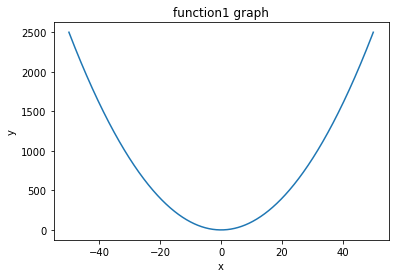

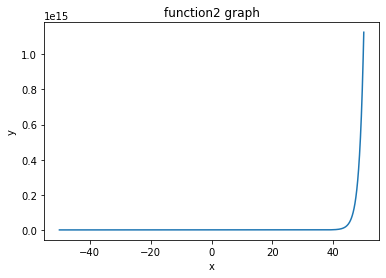

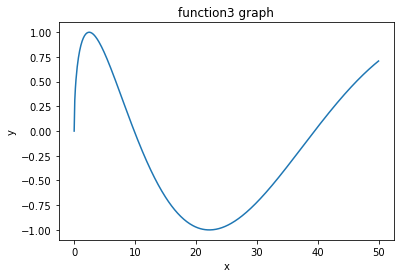

----------------------------------------


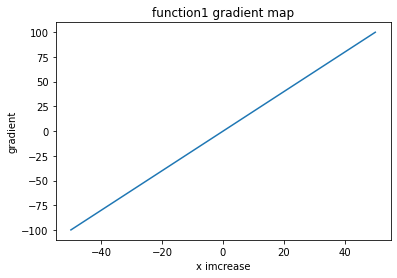

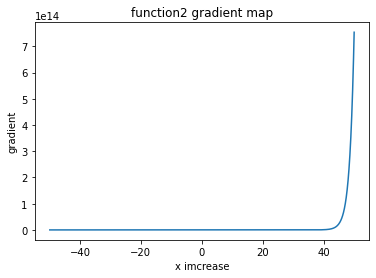

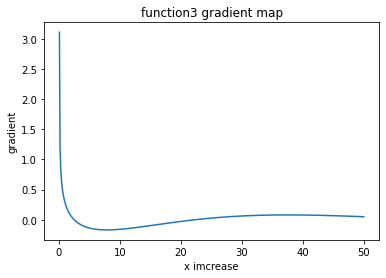

In [98]:
# 問題5 続き
# 各式のグラフ
plt.title("function1 graph")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, function1)
plt.show()

plt.title("function2 graph")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, function2)
plt.show()

plt.title("function3 graph")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, function3)
plt.show()

print("----------------------------------------")

# 横軸をx、縦軸を勾配のグラフ
plt.title("function1 gradient map")
plt.xlabel("x imcrease")
plt.ylabel("gradient")
plt.plot(x[1:], function1_gradient)
plt.show()

plt.title("function2 gradient map")
plt.xlabel("x imcrease")
plt.ylabel("gradient")
plt.plot(x[1:], function2_gradient)
plt.show()


plt.title("function3 gradient map")
plt.xlabel("x imcrease")
plt.ylabel("gradient")
plt.plot(x[1:], function3_gradient)
plt.show()



# 【問題6】最小値を求める
問題5で扱った関数のyの最小値を求めます。xの範囲も問題5と同様とします。


今回は勾配降下法ではなく、ndarrayのminメソッド、argminメソッドを用いてください。minメソッドは最小値を、argminメソッドは最小値のインデックスを取得することができます。


また、最小のyをとる前後の勾配を表示してください。

In [241]:
# 各勾配の最小値を求める
min_function1_gradient = np.min(function1_gradient)
min_function2_gradient = np.min(function2_gradient)
min_function3_gradient = np.min(function3_gradient)

print("xの２乗の最小値は{}".format(min_function1_gradient))
print("2xの２乗+２のx乗の最小値は{}".format(min_function2_gradient))
print("sinのxの1/２乗の最小値は{}".format(min_function3_gradient))

# argminを利用した前後の勾配の求め方
min_function1_gradient_index = np.argmin(function1_gradient) 
min_function2_gradient_index = np.argmin(function2_gradient) 
min_function3_gradient_index = np.argmin(function3_gradient) 

# 最も値の小さいインデックス番号
print("\nxの２乗の最小値のインデックスは{}".format(min_function1_gradient_index))
print("2xの２乗+２のx乗の最小値のインデックスは{}".format(min_function2_gradient_index))
print("sinのxの1/２乗の最小値nのインデックスは{}".format(min_function3_gradient_index))

# 前後の勾配の大きさ
print("\nxの２乗の最小値の前の勾配は{}で後の勾配は{}".format(function1_gradient[min_function1_gradient_index -1],
                                                                                        function1_gradient[min_function1_gradient_index +1]))
print("\nxの２乗の最小値の前の勾配は{}で後の勾配は{}".format(function2_gradient[min_function2_gradient_index -1],
                                                                                        function2_gradient[min_function2_gradient_index +1]))
print("\nxの２乗の最小値の前の勾配は{}で後の勾配は{}".format(function3_gradient[min_function3_gradient_index -1],
                                                                                        function3_gradient[min_function3_gradient_index +1]))


xの２乗の最小値は-99.90000000000094
2xの２乗+２のx乗の最小値は-199.8000000000019
sinのxの1/２乗の最小値は-0.4999479059701756

xの２乗の最小値のインデックスは0
2xの２乗+２のx乗の最小値のインデックスは0
sinのxの1/２乗の最小値nのインデックスは311

xの２乗の最小値の前の勾配は99.9000000000035で後の勾配は-99.70000000000113

xの２乗の最小値の前の勾配は753981485903321.6で後の勾配は-199.40000000000225

xの２乗の最小値の前の勾配は-0.49931755318150445で後の勾配は-0.4993286493617574
